In [ ]:
# credit to: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #print("x", dataX, "y", dataY)
    return np.array(dataX), np.array(dataY)

def dataset_builder(dataset):

    # split into train and test sets
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    return trainX, trainY, testX, testY

In [ ]:
# load the dataset
prod1_dataframe = pd.read_csv('/content/augmented_data_prodid1.csv')
prod2_dataframe = pd.read_csv('/content/augmented_data_prodid2.csv')
prod3_dataframe = pd.read_csv('/content/augmented_data_prodid3.csv')

dfs = [prod1_dataframe, prod2_dataframe, prod3_dataframe]

def preprocessing(dataframe, train_partition, lookback):

  dataframe.drop(columns=['DATE', 'HOUR', 'DAY_OF_WEEK'], inplace=True)
  dataframe.reset_index(drop=True, inplace=True)

  dataset = dataframe.values
  dataset = dataset.astype('float32')

  # normalize the dataset to [0, 1]
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)

  # split into train and test sets
  train_size = int(len(dataset) * train_partition)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # reshape into X=t and Y=t+1
  look_back = 1
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

  # create and fit the LSTM network
  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model, scaler, dataset, trainX, testX, trainY, testY

prod1_model, prod1_scaler, prod1_dataset, prod1_trainX, prod1_testX, prod1_trainY, prod1_testY = preprocessing(prod1_dataframe, 0.7, 1)
prod2_model, prod2_scaler, prod2_dataset, prod2_trainX, prod2_testX, prod2_trainY, prod2_testY = preprocessing(prod2_dataframe, 0.7, 1)
prod3_model, prod3_scaler, prod3_dataset, prod3_trainX, prod3_testX, prod3_trainY, prod3_testY = preprocessing(prod3_dataframe, 0.7, 1)

In [ ]:
prod1_model.fit(prod1_trainX, prod1_trainY, epochs=15, batch_size=1, verbose=2)
prod2_model.fit(prod2_trainX, prod2_trainY, epochs=15, batch_size=1, verbose=2)
prod3_model.fit(prod3_trainX, prod3_trainY, epochs=15, batch_size=1, verbose=2)

Epoch 1/15
754/754 - 3s - loss: 0.0557 - 3s/epoch - 5ms/step
Epoch 2/15
754/754 - 3s - loss: 0.0165 - 3s/epoch - 4ms/step
Epoch 3/15
754/754 - 2s - loss: 0.0095 - 2s/epoch - 3ms/step
Epoch 4/15
754/754 - 2s - loss: 0.0086 - 2s/epoch - 3ms/step
Epoch 5/15
754/754 - 2s - loss: 0.0086 - 2s/epoch - 3ms/step
Epoch 6/15
754/754 - 2s - loss: 0.0085 - 2s/epoch - 3ms/step
Epoch 7/15
754/754 - 3s - loss: 0.0085 - 3s/epoch - 3ms/step
Epoch 8/15
754/754 - 3s - loss: 0.0085 - 3s/epoch - 4ms/step
Epoch 9/15
754/754 - 3s - loss: 0.0085 - 3s/epoch - 3ms/step
Epoch 10/15
754/754 - 3s - loss: 0.0084 - 3s/epoch - 3ms/step
Epoch 11/15
754/754 - 3s - loss: 0.0085 - 3s/epoch - 3ms/step
Epoch 12/15
754/754 - 3s - loss: 0.0086 - 3s/epoch - 4ms/step
Epoch 13/15
754/754 - 2s - loss: 0.0085 - 2s/epoch - 3ms/step
Epoch 14/15
754/754 - 2s - loss: 0.0085 - 2s/epoch - 3ms/step
Epoch 15/15
754/754 - 2s - loss: 0.0085 - 2s/epoch - 3ms/step
Epoch 1/15
754/754 - 4s - loss: 0.0442 - 4s/epoch - 6ms/step
Epoch 2/15
754/754

11/11 [==============================] - 0s 2ms/step
error scores prodid = 1
Train Score: 62.45 RMSE
Test Score: 61.00 RMSE


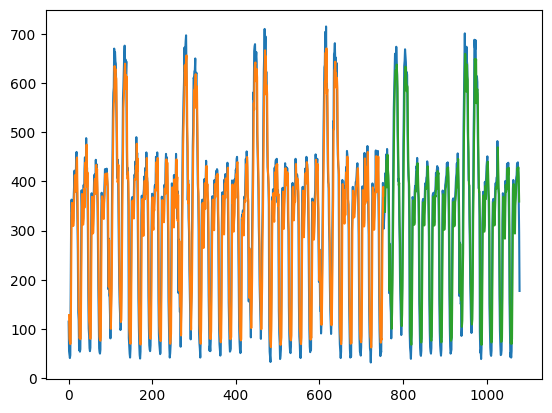

In [ ]:
look_back = 1

# make predictions
trainX, trainY, testX, testY = dataset_builder(prod1_dataset)
trainPredict = prod1_model.predict(trainX)
testPredict = prod1_model.predict(testX)
# invert predictions
trainPredict = prod1_scaler.inverse_transform(trainPredict)
trainY = prod1_scaler.inverse_transform([trainY])
testPredict = prod1_scaler.inverse_transform(testPredict)
testY = prod1_scaler.inverse_transform([testY])
# calculate root mean squared error
print("error scores prodid = 1")
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
dataset = prod1_dataset
scaler = prod1_scaler
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



11/11 [==============================] - 0s 2ms/step
error scores prodid = 2
Train Score: 171.54 RMSE
Test Score: 160.59 RMSE


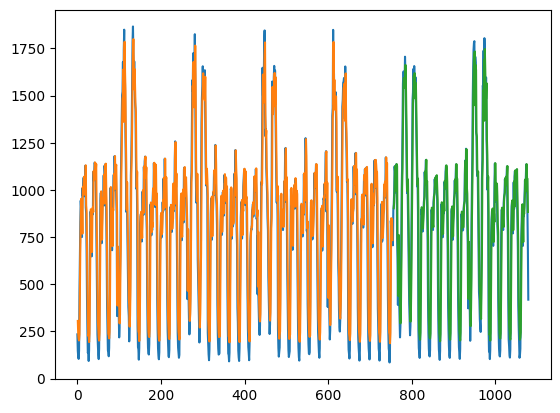

In [ ]:
# make predictions
trainX, trainY, testX, testY = dataset_builder(prod2_dataset)
trainPredict = prod2_model.predict(trainX)
testPredict = prod2_model.predict(testX)
# invert predictions
trainPredict = prod2_scaler.inverse_transform(trainPredict)
trainY = prod2_scaler.inverse_transform([trainY])
testPredict = prod2_scaler.inverse_transform(testPredict)
testY = prod2_scaler.inverse_transform([testY])
# calculate root mean squared error
print("error scores prodid = 2")
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
dataset = prod2_dataset
scaler = prod2_scaler
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



11/11 [==============================] - 0s 2ms/step
error scores prodid = 3
Train Score: 370.35 RMSE
Test Score: 325.25 RMSE


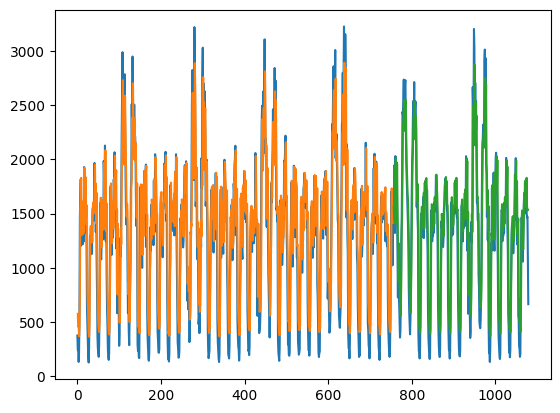

In [ ]:
# make predictions
trainX, trainY, testX, testY = dataset_builder(prod3_dataset)
trainPredict = prod3_model.predict(trainX)
testPredict = prod3_model.predict(testX)
# invert predictions
trainPredict = prod3_scaler.inverse_transform(trainPredict)
trainY = prod3_scaler.inverse_transform([trainY])
testPredict = prod3_scaler.inverse_transform(testPredict)
testY = prod3_scaler.inverse_transform([testY])
# calculate root mean squared error
print("error scores prodid = 3")
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
dataset = prod3_dataset
scaler = prod3_scaler
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#predictions

prod1_week0 = prod1_dataset[-168:]

# make predictions
look_back = 1
prod1_week0, _ = create_dataset(prod1_week0, look_back)
prod1_week0 = np.reshape(prod1_week0, (prod1_week0.shape[0], 1, prod1_week0.shape[1]))
prod1_week1 = prod1_model.predict(prod1_week0)

# invert predictions
prod1_week1 = prod1_scaler.inverse_transform(prod1_week1)
prod1_predict_df = pd.DataFrame(prod1_week1, columns=['PREDICTED_IMPRESSIONS'])
prod1_predict_df.to_csv('/content/prod1_predictions_week1.csv', index=False)

6/6 [==============================] - 0s 2ms/step


In [ ]:
#predictions

prod2_week0 = prod2_dataset[-168:]

# make predictions
look_back = 1
prod2_week0, _ = create_dataset(prod2_week0, look_back)
prod2_week0 = np.reshape(prod2_week0, (prod2_week0.shape[0], 1, prod2_week0.shape[1]))
prod2_week1 = prod2_model.predict(prod2_week0)

# invert predictions
prod2_week1 = prod2_scaler.inverse_transform(prod2_week1)
prod2_predict_df = pd.DataFrame(prod2_week1, columns=['PREDICTED_IMPRESSIONS'])
prod2_predict_df.to_csv('/content/prod2_predictions_week1.csv', index=False)

6/6 [==============================] - 0s 2ms/step


In [ ]:
#predictions

prod3_week0 = prod3_dataset[-168:]

# make predictions
look_back = 1
prod3_week0, _ = create_dataset(prod3_week0, look_back)
prod3_week0 = np.reshape(prod3_week0, (prod3_week0.shape[0], 1, prod3_week0.shape[1]))
prod3_week1 = prod3_model.predict(prod3_week0)

# invert predictions
prod3_week1 = prod3_scaler.inverse_transform(prod3_week1)
prod3_predict_df = pd.DataFrame(prod3_week1, columns=['PREDICTED_IMPRESSIONS'])
prod3_predict_df.to_csv('/content/prod3_predictions_week1.csv', index=False)

6/6 [==============================] - 0s 2ms/step


In [ ]:
predict_df.head()

,Impressions
0,121.482330
1,87.430435
2,76.112007
3,78.879768
4,82.438446
